<a href="https://colab.research.google.com/github/angeruzzi/AnaliseExploratoria/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#LINEAR REGRESSION

A regressão linear é uma técnica ....

Dados de Exemplo: Dados pessoais e de custo médico para previsão de custo de seguro ( https://www.kaggle.com/mirichoi0218/insurance )

In [35]:
#Bibliotecas

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [12]:
#Base de Dados
fonte = 'https://raw.githubusercontent.com/angeruzzi/MachineLearningRef/main/dataInsurance.csv'
dados = pd.read_csv(fonte)
dados.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [13]:
#Transformações

#Variável smoker para 0 e 1
dados['smoker'] = dados['smoker'].map({'yes':1, 'no':0})

#Alterar a escala da variável resposta charges (custo) para mil dólares 
dados['charges'] = dados['charges']/1000

#Faremos as análise utilizando apenas 3 variáveis : charges (custo), bmi (indice de massa corporal) e smoker (fumante)
dados = dados[['bmi', 'smoker', 'charges']]

dados.head()

,bmi,smoker,charges
0,27.900,1,16.884924
1,33.770,0,1.725552
2,33.000,0,4.449462
3,22.705,0,21.984471
4,28.880,0,3.866855


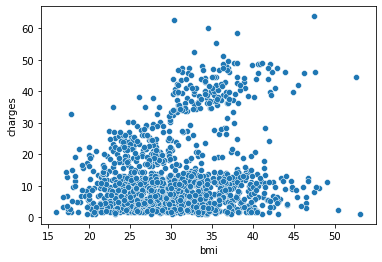

In [17]:
#Gráfico de Dispersão
sns.scatterplot(x = 'bmi', y='charges', data = dados)

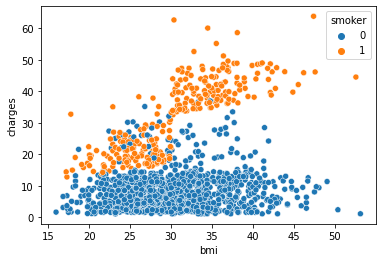

In [19]:
#Destacando a variável smoker
sns.scatterplot(x = 'bmi', y='charges', hue = 'smoker', data = dados)

In [22]:
#Aplicando o Modelo de Regressão Linear
#Objetivo: Prever a variável CHARGES a partir da BMI

X = dados[['bmi']]
y = dados['charges']
regressao = LinearRegression()
regressao.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
#CUSTOS = b0 + b1 * BMI
print('b0 = ', regressao.intercept_)
print('b1 = ', regressao.coef_ [0] )

b0 =  1.1929372089611512
b1 =  0.3938730307973951


In [25]:
#Utilizando o modelo criado
#Predizer os custos de 3 pessoas cujos IMC sejam 15, 22 e 28
newdata = pd.DataFrame({'bmi':[15, 22, 28]})
regressao.predict(newdata)

array([ 7.10103267,  9.85814389, 12.22138207])

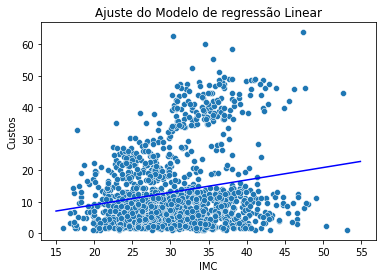

In [34]:
#Gráfico do modelo

#Dados da reta de Regressão
b0 = regressao.intercept_
b1 = regressao.coef_
pontos_em_x = np.arange(15,55,0.1) #array de numeros variando 0.1 de 15 a 55
pontos_em_y = b0 + b1*pontos_em_x

#seaborn
sns.scatterplot(x = 'bmi', y='charges', data = dados)

#matplotlib
plt.plot(pontos_em_x, pontos_em_y, color = 'blue')
plt.title('Ajuste do Modelo de regressão Linear')
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.show()

In [37]:
#Avaliação do Erro do Modelo

#Erro Quadrático Médio

preditos = regressao.predict(X)
eqm = mean_squared_error(y, preditos)

print('EQM da Regressão Linear: {}'.format(round(eqm, 2)))

EQM da Regressão Linear: 140.78
